# Using keywords 'gravcl' and 'segmentfaces'

In [1]:
from trustutils import run 

run.introduction("A.Bruneton")

## Introduction 
 Validation made by : A.Bruneton



 Report generated 27/01/2022

## Introduction
Validation made by: A.Bruneton. \
Report generated (date)

### Description 
This note describes the usage of the new post-processing keywords 'gravcl' and 'segmentfaces{x—y—z}' inside the definition of a probe.  All the results are presented on the Convection test case for which the domain is U-shaped with imposed input velocity, and imposed output pressure.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Post_GravCl_SegmentFaces/build)

### Parameters TRUST
* Version TRUST:  
* Binary()

In [3]:
run.addCase("." ,"Convection.data")
run.printCases()
run.runCases()

### Test cases 
* ./Convection.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.3s.


## Keyword 'gravcl'
As  a  reminder  the  final  position  of  a  probe  can  be  be  shifted  using  keywords  'som',  'chsom',  'grav',or  'nodes'.   The  new  keyword  'gravcl'  behaves  exactly  like  'grav',  but  will  also  include  the  boundary condition value in the postprocessing if one (or the two) extreme point(s) of the probe is located on the center of gravity of the boundary face.  For example for the pressure in VDF (naturally located at the element center), this keyword will add the boundary value of the pressure.Note that this only works if the extreme point is located on the face center of gravity (within epsilon). Note also that this doesn't work for some BC, typically 'symmetry' is not supported.
###  
The  left  handside  is  not  covered  because  it  is  a  'symmetry'  BC.  Trying  to  extend  the  probe  there  will trigger an error.

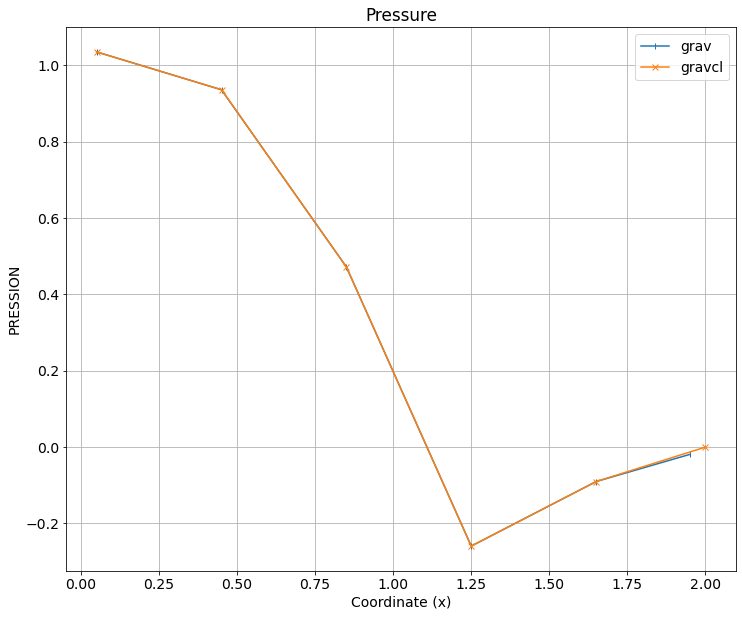

In [4]:
from trustutils import plot

Graphique=plot.Graph("Pressure")
Graphique.addSegment("Convection_SONDE_PRESSION_GRAV.son",label="grav",marker='-|')
Graphique.addSegment("Convection_SONDE_PRESSION_GRAVCL.son",label="gravcl",marker='-x')

## Keyword 'segmentfaces'
The probe type 'segmentfacesx' (resp.  'segmentfacesy', 'segmentfacesz') is typically used in VDF with the velocity field.  It forces the code to move the probe location to the closest discretisation point of the fieldfor the given direction.  Hence for the velocity in VDF, specifying 'segmentfacesx' (instead of 'segment') will  shift  the  probe  location  to  the  closest  discretisation  point  where  the  X  component  is  computed, corresponding to a face aligned with the Oy axis.
###

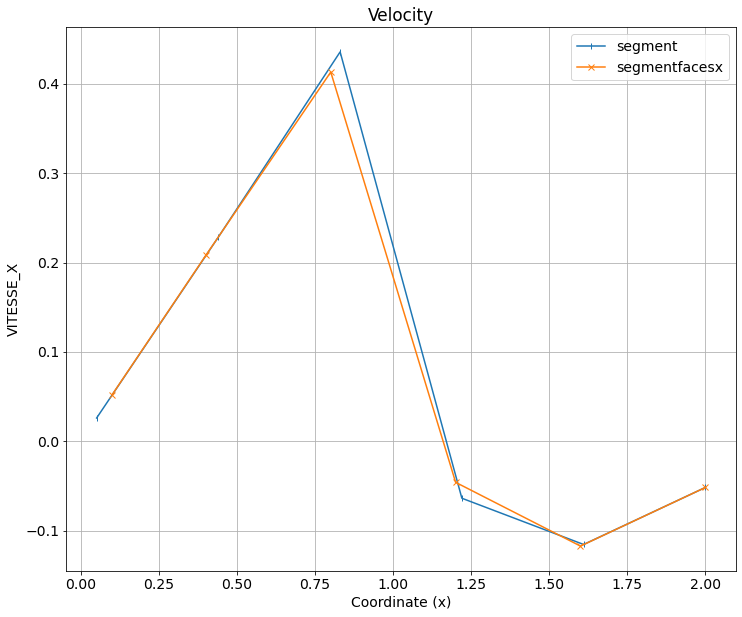

In [5]:
Graphique=plot.Graph("Velocity")
Graphique.addSegment("Convection_SONDE_VITESSE.son",label="segment",marker='-|')
Graphique.addSegment("Convection_SONDE_VITESSE_SX.son",label="segmentfacesx",marker='-x')

## Dataset illustrating the usage of ’gravcl’ and ’segmentfacesx’

In [6]:
run.dumpDataset("Convection.data",[ "probe", " gravcl", "segmentfacesx"]) 

 # Thermohydraulique 2D : Equation energie non couplee #
 # PARALLEL OK #
 dimension 2
 
 Domaine dom
 # BEGIN MESH #
 Mailler dom
 {
 	 Pave Entree 
 	 {
 	 Origine 0. 0.
 	 Nombre_de_Noeuds 11 11
 	 Longueurs 1.0 1.0
 	 }
 	 {
 	 Bord Entree1 Y = 0. 0. <= X <= 0.5
 	 Bord Entree2 Y = 0. 0.5 <= X <= 1.
 	 Bord Ouest  X = 0. 0. <= Y <= 1.
 	 Bord Est    X = 1. 0. <= Y <= 1.
 	 } ,
 	 Pave Sortie
 	 {
 	 Origine 0. 1.
 	 Nombre_de_Noeuds 21 11
 	 Longueurs 2.0 1.0
 	 }
 	 {
 	 Bord Sortie X = 2. 1. <= Y <= 2.
 	 Bord Haut   Y = 2. 0. <= X <= 2.
 	 Bord Ouest1 X = 0. 1. <= Y <= 2.
 	 Bord Bas    Y = 1. 1. <= X <= 2.
 	 }
 }
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool metis { Nb_parts 2 }
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 VDF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 10. 
 	 dt_min 0.0001 
 	 dt_max 1.
 	 dt_impr 0.01
 	 dt_sauv 100
 	 seuil_statio 1e-8
 }
 